# Завдання 3

Реалізуйте алгоритм Дейкстри для знаходження найкоротшого шляху в розробленому графі: додайте у граф ваги до ребер та знайдіть найкоротший шлях між всіма вершинами графа.

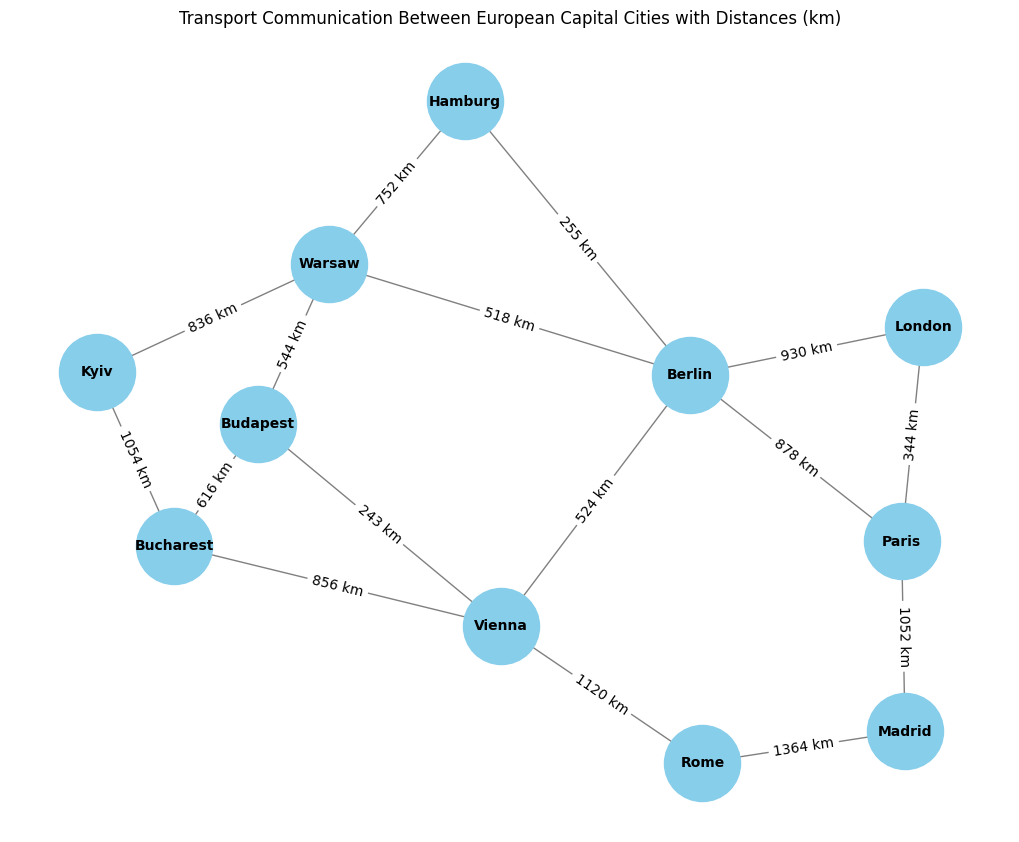

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

graph_as_list_with_weights = {
    "London": [("Paris", 344), ("Berlin", 930)],
    "Berlin": [("London", 930), ("Paris", 878), ("Vienna", 524), ("Warsaw", 518), ("Hamburg", 255)],
    "Paris": [("London", 344), ("Berlin", 878), ("Madrid", 1052)],
    "Madrid": [("Paris", 1052), ("Rome", 1364)],
    "Rome": [("Madrid", 1364), ("Vienna", 1120)],
    "Vienna": [("Berlin", 524), ("Rome", 1120), ("Budapest", 243), ("Bucharest", 856)],
    "Bucharest": [("Vienna", 856), ("Budapest", 616), ("Kyiv", 1054)],
    "Hamburg": [("Berlin", 255), ("Warsaw", 752)],
    "Warsaw": [("Berlin", 518), ("Hamburg", 752), ("Budapest", 544), ("Kyiv", 836)],
    "Budapest": [("Vienna", 243), ("Warsaw", 544), ("Bucharest", 616)],
    "Kyiv": [("Warsaw", 836), ("Bucharest", 1054)]
}

G = nx.Graph()

for city, neighbors in graph_as_list_with_weights.items():
    for neighbor, weight in neighbors:
        G.add_edge(city, neighbor, weight=weight)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']} km" for u, v, d in G.edges(data=True)})
plt.title("Transport Communication Between European Capital Cities with Distances (km)")
plt.show()


## Найкоротші шляхи до усіх вершин від заданої

In [4]:
def dijkstra(graph, start):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    unvisited = list(graph.keys())

    while unvisited:
        current_vertex = min(unvisited, key=lambda vertex: distances[vertex])

        if distances[current_vertex] == float('infinity'):
            break

        for neighbor, weight in graph[current_vertex].items():
            distance = distances[current_vertex] + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance

        unvisited.remove(current_vertex)

    return distances

In [6]:
graph_as_dict_with_weights = {
    "London": {"Paris": 344, "Berlin": 930},
    "Berlin": {"London": 930, "Paris": 878, "Vienna": 524, "Warsaw": 518, "Hamburg": 255},
    "Paris": {"London": 344, "Berlin": 878, "Madrid": 1052},
    "Madrid": {"Paris": 1052, "Rome": 1364},
    "Rome": {"Madrid": 1364, "Vienna": 1120},
    "Vienna": {"Berlin": 524, "Rome": 1120, "Budapest": 243, "Bucharest": 856},
    "Bucharest": {"Vienna": 856, "Budapest": 616, "Kyiv": 1054},
    "Hamburg": {"Berlin": 255, "Warsaw": 752},
    "Warsaw": {"Berlin": 518, "Hamburg": 752, "Budapest": 544, "Kyiv": 836},
    "Budapest": {"Vienna": 243, "Warsaw": 544, "Bucharest": 616},
    "Kyiv": {"Warsaw": 836, "Bucharest": 1054}
}

In [7]:
print(dijkstra(graph_as_dict_with_weights, 'Kyiv'))

{'London': 2284, 'Berlin': 1354, 'Paris': 2232, 'Madrid': 3284, 'Rome': 2743, 'Vienna': 1623, 'Bucharest': 1054, 'Hamburg': 1588, 'Warsaw': 836, 'Budapest': 1380, 'Kyiv': 0}
